In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import train_test_split as tts,RepeatedKFold ,cross_val_score ,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv(r"C:\Users\SURAJ\Downloads\Ridge_car_data.txt.csv")
df.dropna(inplace=True)
df.drop("car name",axis=1,inplace=True)
df.head()

,mpg,cylinders,displacement,weight,acceleration,model year,horsepower,origin
0,18.0,8,307.0,3504,12.0,70,130.0,1
1,15.0,8,350.0,3693,11.5,70,165.0,1
2,18.0,8,318.0,3436,11.0,70,150.0,1
3,16.0,8,304.0,3433,12.0,70,150.0,1
4,17.0,8,302.0,3449,10.5,70,140.0,1


In [32]:
ind = df[['mpg']]
dep = df.drop("mpg",axis=1)
X_train,X_test,y_train,y_test = tts(dep,ind,train_size=0.8,random_state=1)
print(X_test.shape)
print(X_train.shape)

(79, 7)
(313, 7)


In [37]:
from sklearn.preprocessing import StandardScaler 
Scale = StandardScaler()
X_train_scaled= Scale.fit_transform(X_train)
X_test_scaled = Scale.fit_transform(X_test)

In [38]:
Score = []
coeff = []
intercept = []
R_square = []
Adj_rsq =[]
MSE_train = []
MSE_test = []
alp_l1 =np.arange(1,20)

for i in (alp_l1):
    model = ElasticNet(i)
    rd = model.fit(X_train_scaled,y_train)
    coeff.append(rd.coef_)
    intercept.append(rd.intercept_)
    R_square.append(r2_score(rd.predict(X_test_scaled),y_test))
    Adj_rsq.append(1 - (1 - np.mean(np.array(R_square)) * (len(X_test) - 1) / (len(X_test) - len(X_test.columns) - 1)))
    MSE_train.append(mean_squared_error(rd.predict(X_train_scaled),y_train))
    MSE_test.append(mean_squared_error(rd.predict(X_test_scaled),y_test))

In [48]:
int=pd.DataFrame(intercept)
int.columns = ["intercept"]
coeffs = pd.DataFrame(np.matrix(np.array(coeff)),columns=X_train.columns)
elastic = pd.DataFrame({
    "alpha" : alp_l1,
    "R_squre" : R_square,
    "Adj_rsquare" :Adj_rsq,
    "MSE_train" : MSE_train,
    "MSE_test" : MSE_test
    
})

elastic_data=pd.concat([elastic,int,coeffs],axis=1)
elastic_data

Text(0.5, 1.0, 'Lambda V/c coefficeints')

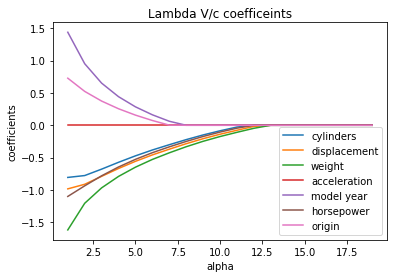

In [39]:
ax= plt.gca()
ax.plot(elastic_data["alpha"],coeffs,label = X_test.columns)
plt.legend()
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lambda V/c coefficeints')



Text(0.5, 1.0, 'Overfitting and Underfitting')

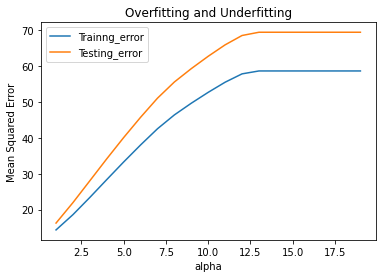

In [40]:
# overfit _ underfit 
plt.plot(elastic_data["alpha"],elastic_data.MSE_train,label="Trainng_error")
plt.plot(elastic_data["alpha"],elastic_data.MSE_test,label="Testing_error")
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.title('Overfitting and Underfitting')

In [42]:
from sklearn.linear_model import ElasticNetCV

In [43]:
mod = ElasticNetCV(cv=10,random_state=1).fit(X_train_scaled,y_train)
mod.alpha_

0.012688003447364534

In [44]:
mod_ =ElasticNet(0.5).fit(X_train_scaled,y_train)

In [45]:
mod_.coef_

array([-0.68301071, -0.88288068, -2.11460323,  0.        ,  1.83897813,
       -1.15306974,  0.8699896 ])

In [46]:
mod_.intercept_

array([23.40415335])